# 5.2 prepare particles

In [22]:
import sys
sys.path.append('../scripts/')
from robot import *

In [33]:
class Mcl:
    def __init__(self, init_pose, num):
        self.particles = [Particle(init_pose) for i in range(num)]
        
    def draw(self, ax, elems):
        start_xs = [p.pose[0] for p in self.particles]         
        start_ys = [p.pose[1] for p in self.particles] 
        end_xs = [math.cos(p.pose[2]) for p in self.particles]         
        end_ys = [math.sin(p.pose[2]) for p in self.particles] 
        elems.append(ax.quiver(start_xs, start_ys, end_xs, end_ys, color="blue", alpha=0.5))

In [34]:
class Particle:
    def __init__(self, init_pose):
        self.pose = init_pose

In [35]:
class EstimationAgent(Agent):
    def __init__(self, nu, omega, estimator):
        super().__init__(nu, omega)
        self.estimator = estimator
        
    def draw(self, ax, elems):
        self.estimator.draw(ax, elems)          

### create world and add landmarks

In [36]:
world = World(30, 0.1)
map = Map()
for lndmk in [(-4,2),(2,-3),(3,3)]:
    map.append_landmark(Landmark(*lndmk))
world.append(map)

### create robot

In [37]:
initial_pose = np.array([2,2,math.pi / 6])
estimator = Mcl(initial_pose, 100)
circling = EstimationAgent(0.2, 10/180*math.pi, estimator)
robo = Robot(initial_pose, sensor=Camera(map), agent=circling)
world.append(robo)

<IPython.core.display.Javascript object>


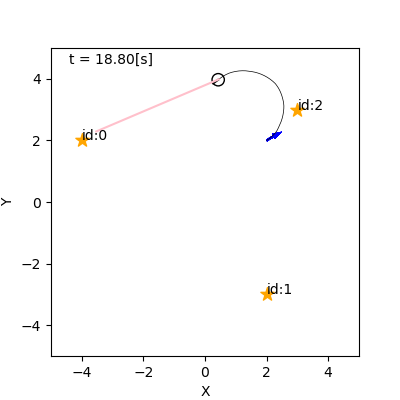

In [38]:
world.draw()